In [ ]:
#!pip install numpy
%load_ext autoreload
%autoreload 2
#import pgl
from pgl import pgl as pglLibrary
from pgl import screen as pglScreen
from pgl import task as pglTask
import numpy as np
import sys
from PIL import Image
print(sys.version)

In [85]:
pgl = pglLibrary()
#pgl.verbose=2
#pgl.open(0,880, 600)
pgl.open(0,880, 600)
#pgl.open()
pgl.visualAngle(57,40,30)
#pgl.getWindowFrameInDisplay()
#print(pgl.screenX.pix)
#print(pgl.screenY.pix)
#print(pgl.screenWidth)
#print(pgl.screenHeight)
#pgl.setWindowFrameInDisplay(1, 100, 100, 800, 600)
#pgl.verbose = 1
pgl.getResolution()
#pgl.getWindowFrameInDisplay()
#pgl.setResolution(0, 1920, 1200, 120, 32)
#pgl.setResolution(0, 3840, 1080, 60, 32)
#pgl.setResolution(0, 1512, 982, 60, 32)
#pgl.checkOS()
#help(pgl.checkOS)
#pgl.getNumDisplaysAndDefault()


(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 15.5
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 3 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display)
(pgl:checkOS)   BenQ EX2780Q: 2560 x 1440 (QHD/WQHD - Wide Quad High Definition) (Unknown type)
(pglBase) Verbosity level set to 1
(pglBase) Main library instance created
(pglBase:open) Starting mglMetal application: /Users/justin/Library/Developer/Xcode/DerivedData/Build/Products/Debug/mglMetal.app
(pglBase:open) Using socket with address: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.0Ipeisou9I
(pgl:_pglComm) .Connected to: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.0Ipeisou9I
(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits


(1512, 982, 120, 32)

(pglProfile) Cleared all profile data.
120
(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits
(pglProfile) profileModeBufferSize set to 7200 frames (60.00 seconds)
(pglProfile) Will reallocate if this is exceeded, but you can change this with pgl.profileModeBufferSize = <new size>
(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits
(pglProfile) profileMode set to 2
(pglProfile) profileMode is off, saving profile data.
(pglProfile) profileMode set to 0
-------- pglProfile 1 -------------
120 frames, 1.046 secs Screen: 1 (880x600)
Started: 2025-07-25 23:07:21 Ended: 23:07:22
Frame Rate: 120 Hz Expected Frame Time: 8.33 ms
Median frame time: 8.33 ms, 8.72 ± 4.25 mean ± std ms
Dropped frames (longer than 13.08 ms): 1 (0.83%)
  Dropped Frame 1: 54.80 ms
     ack: 2684090880.000 ms (relative to 2686777.5)
     commandCode: 1001
     success: 1
     processedTime: 2684090880.000 ms (relative to 2686777.5)
     vertexStart: 2684090624.000 ms
     vertexEnd: 26840

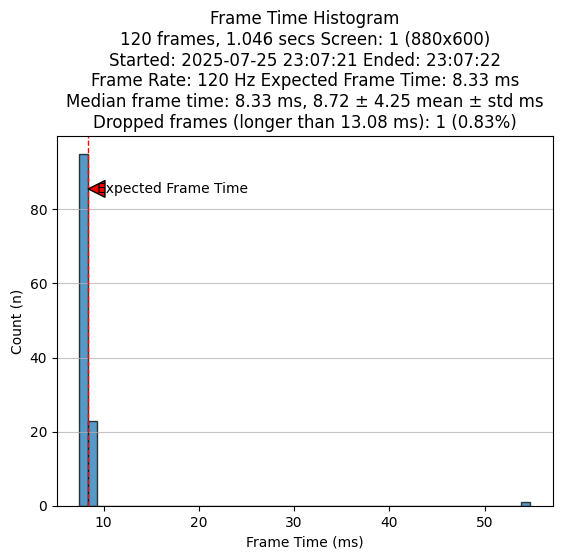

In [86]:
pgl.profileModeClearAll()
#pgl.fullScreen(True)
_,_,frameRate,_ =pgl.getResolution()
print(frameRate)
pgl.profileMode = 2
#print(pgl.profileMode)
#print(pgl.profileModeBufferSize )
pgl.clearScreen([0,0,0])
pgl.flush()
for i in range(frameRate*1):
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    pgl.flush()
pgl.profileMode = 0
#pgl.fullScreen(False)
pgl.profileModeDisplay()


In [87]:
_,_,frameRate,_ =pgl.getResolution()
pgl.profileModeClearAll()
pgl.batchStart()
for i in range(frameRate*5):
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    #pgl.printCommandResults()
    pgl.flush()
    #pgl.printCommandResults()
#pgl.batchRun()
#pgl.batchEnd()

(pglProfile) Cleared all profile data.(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits

(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits
(pglBatch:batchStart) Batch started.


(pglBatch:batchRun) Batch run initiated.
(pglBatch:batchEnd) Ended batch with 1200 commands.
-------- pglProfile 1 -------------
600 frames, 5.007 secs Screen: 1 (880x600)
Started: 2025-07-25 23:07:29 Ended: 23:07:36
Frame Rate: 120 Hz Expected Frame Time: 8.33 ms
Median frame time: 8.33 ms, 8.34 ± 0.80 mean ± std ms
Dropped frames (longer than 12.52 ms): 1 (0.17%)
  Dropped Frame 45: 13.84 ms
Index 44 out of bounds for ack array
     commandCode: 1005
     success: 1
     processedTime: 2684101052.254 ms 
     drawableAcquired: -2686785.059 ms


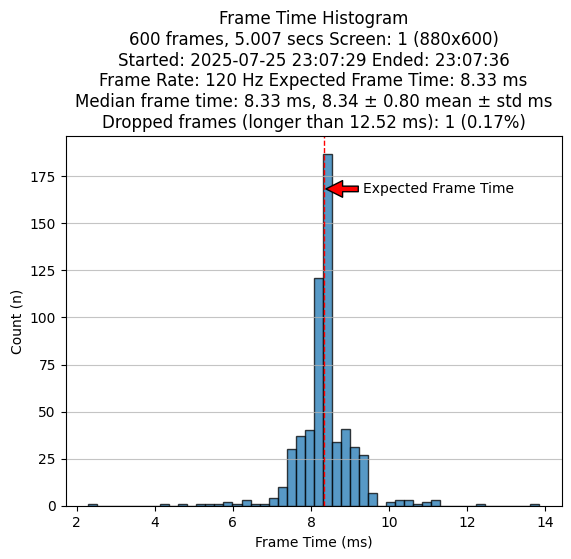

In [88]:
pgl.batchRun()
pgl.batchEnd()
pgl.profileModeDisplay()

In [116]:
im = Image.open('/Users/justin/proj/pgl/testimage.jpg')
im = im.convert('RGBA')
im = im.resize((300, 200))
imData = np.array(im)/255.0
print(imData)

[[[0.11372549 0.10980392 0.09803922 1.        ]
  [0.11764706 0.11764706 0.10588235 1.        ]
  [0.1254902  0.11764706 0.10196078 1.        ]
  ...
  [0.14901961 0.14901961 0.14117647 1.        ]
  [0.14901961 0.14901961 0.14117647 1.        ]
  [0.14509804 0.14901961 0.14117647 1.        ]]

 [[0.14117647 0.1372549  0.1372549  1.        ]
  [0.1372549  0.13333333 0.13333333 1.        ]
  [0.1372549  0.13333333 0.12941176 1.        ]
  ...
  [0.15294118 0.15294118 0.14901961 1.        ]
  [0.15294118 0.15686275 0.14901961 1.        ]
  [0.15294118 0.15686275 0.15294118 1.        ]]

 [[0.18039216 0.19215686 0.19607843 1.        ]
  [0.17254902 0.17647059 0.18431373 1.        ]
  [0.16862745 0.16862745 0.17647059 1.        ]
  ...
  [0.16470588 0.16862745 0.16078431 1.        ]
  [0.14901961 0.15686275 0.14509804 1.        ]
  [0.15294118 0.16470588 0.14509804 1.        ]]

 ...

 [[0.18431373 0.2        0.14509804 1.        ]
  [0.14509804 0.16470588 0.12156863 1.        ]
  [0.09411

In [117]:
im = pgl.imageCreate(imData)
im.print()

imageNum: 4 (200x300)


In [118]:
pgl.clearScreen(np.random.rand(3))
im.print()
im.display()
pgl.flush()

imageNum: 4 (200x300)


True

In [84]:
pgl.clearScreen(np.random.rand(3))
pgl.flush()
pgl.close()

(pglBase:close) Closing connection to mglMetal application
(pglBase:close) Closing mglMetal application with PID 43937
(pglBase:close) mglMetal application with PID: 43937 was killed successfully.
(pgl:_pglComm) Closed socket: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.E5XyuhSvMo


True

In [ ]:
#commandResults = pgl.profileModeCommandResults
#print(commandResults[0])
#commandResults = pgl.profileList[0].get('commandResults', 'None')
#print(commandResults['processedTime'])
#print(list(pgl.profileList[0].keys()))
pgl.flush()
pgl.printCommandResults()

In [ ]:
pgl.visualAngle(57,40,30)
print(pgl.screenWidth)
print(pgl.screenHeight)
#pgl.printCommandResults()
#print(pgl.xform)
pgl.clearScreen([0,0,0])
pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
pgl.printCommandResults()
pgl.flush()

In [ ]:
from pprint import pprint


pprint(pgl.gpuInfo)


In [ ]:
(screenWidth, screenHeight, refreshRate, bitDepth) = pglDisplayInfo.getResolution(1)
print(f"screenResolution: {screenWidth}x{screenHeight} refreshRate: {refreshRate} bitDepth: {bitDepth}")

pglDisplayInfo.setResolution(1, screenWidth, screenHeight, refreshRate, bitDepth)

Install pgl library

In [ ]:
pgl = pglLibrary()
pgl.getResolution(0)


Instal screen and task

In [ ]:
#init screen
s = pglScreen();
s.helloworld();

# init task
t = pglTask();
t.helloworld();


In [ ]:
# start MATLAB
import matlab.engine
eng = matlab.engine.start_matlab()

# add mgl to path
eng.addpath(eng.genpath("/Users/justin/proj/mgl"),nargout=0)


In [ ]:
# mgl from python using mgl engine test
eng.eval("mglOpen;",nargout=0)
eng.eval("mglVisualAngleCoordinates(57,[16,24]);",nargout=0)
eng.eval("mglClearScreen([0.3 0.7 0.2]);",nargout=0)
eng.eval("mglTextDraw('Hello World!',[0 0]);",nargout=0)
eng.eval("mglFlush;",nargout=0)
eng.eval("mglWaitSecs(3);",nargout=0)
eng.eval("mglClose;",nargout=0)

